In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
import helper_fns
import scanpy as sc

celltypst -> ID  ---START---

In [8]:
results = pd.read_csv('results_0908/celltypist_results.csv')
mean_results=results.groupby(['model']).mean().reset_index()

(0.8, 1.0)

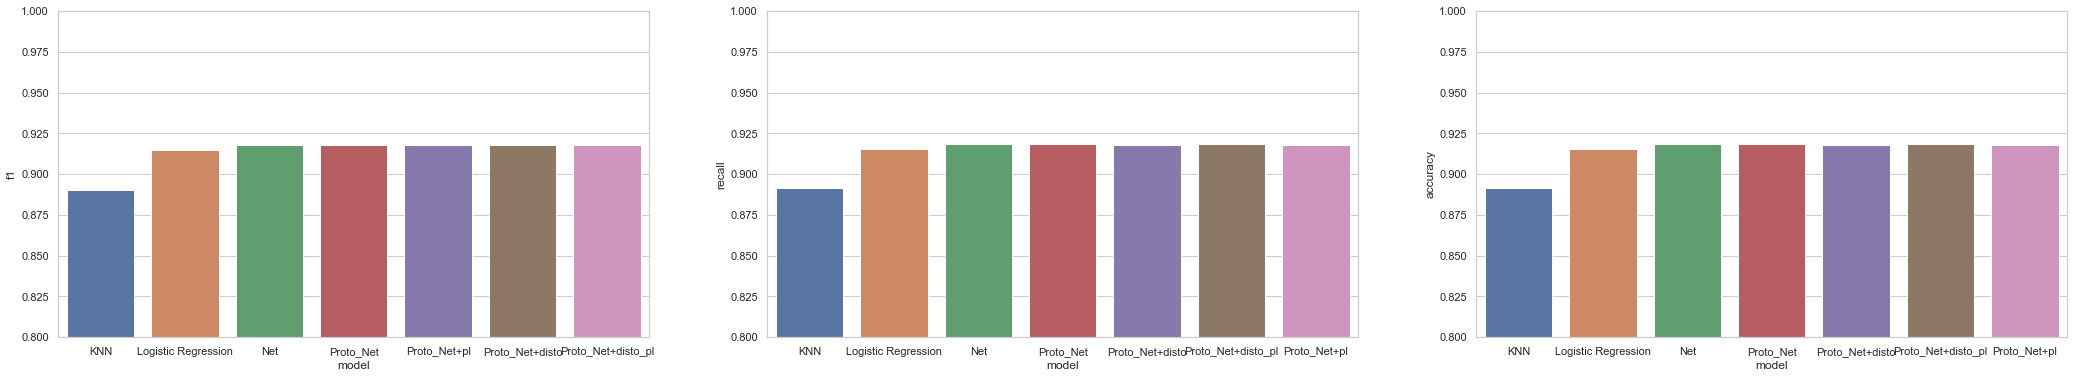

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(36, 6)
sns.barplot(x='model', y='f1', data=mean_results, order=['KNN', 'Logistic Regression', 'Net', 'Proto_Net', 'Proto_Net+pl', 'Proto_Net+disto', 'Proto_Net+disto_pl'], ax=ax1)
ax1.set_ylim(0.8, 1)
sns.barplot(x='model', y='recall', data=mean_results, order=['KNN', 'Logistic Regression', 'Net', 'Proto_Net', 'Proto_Net+pl', 'Proto_Net+disto', 'Proto_Net+disto_pl'], ax=ax2)
ax2.set_ylim(0.8, 1)
sns.barplot(x='model', y='accuracy', data=mean_results, order=['KNN', 'Logistic Regression', 'Net', 'Proto_Net', 'Proto_Net+pl', 'Proto_Net+disto', 'Proto_Net+disto_pl'], ax=ax3)
ax3.set_ylim(0.8, 1)

(5.0, 15.0)

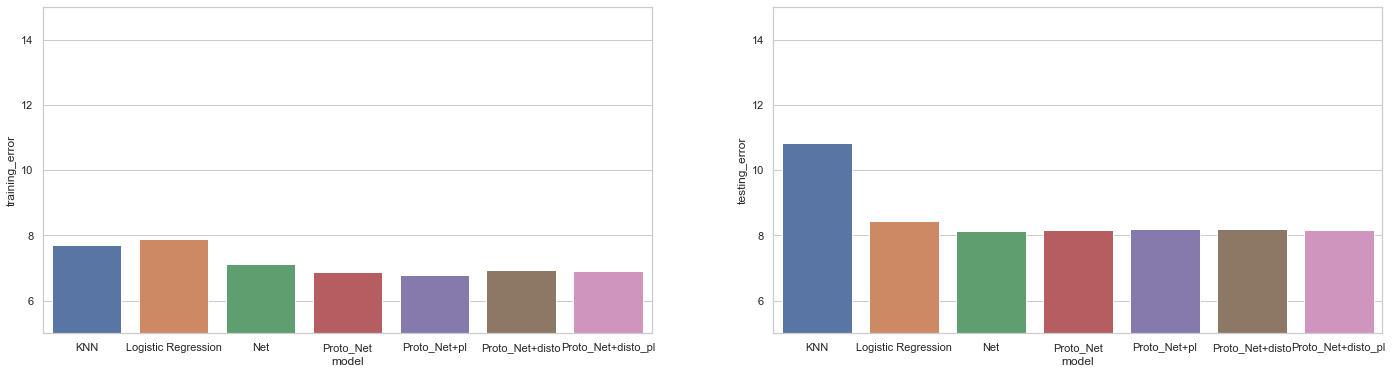

In [50]:
fig, (ax4, ax5) = plt.subplots(1, 2)
fig.set_size_inches(24, 6)
sns.barplot(x='model', y='training_error', data=mean_results, order=['KNN', 'Logistic Regression', 'Net', 'Proto_Net', 'Proto_Net+pl', 'Proto_Net+disto', 'Proto_Net+disto_pl'], ax=ax4)
ax4.set_ylim(5, 15)
sns.barplot(x='model', y='testing_error', data=mean_results, order=['KNN', 'Logistic Regression', 'Net', 'Proto_Net', 'Proto_Net+pl', 'Proto_Net+disto', 'Proto_Net+disto_pl'], ax=ax5)
ax5.set_ylim(5, 15)

(0.8, 1.0)

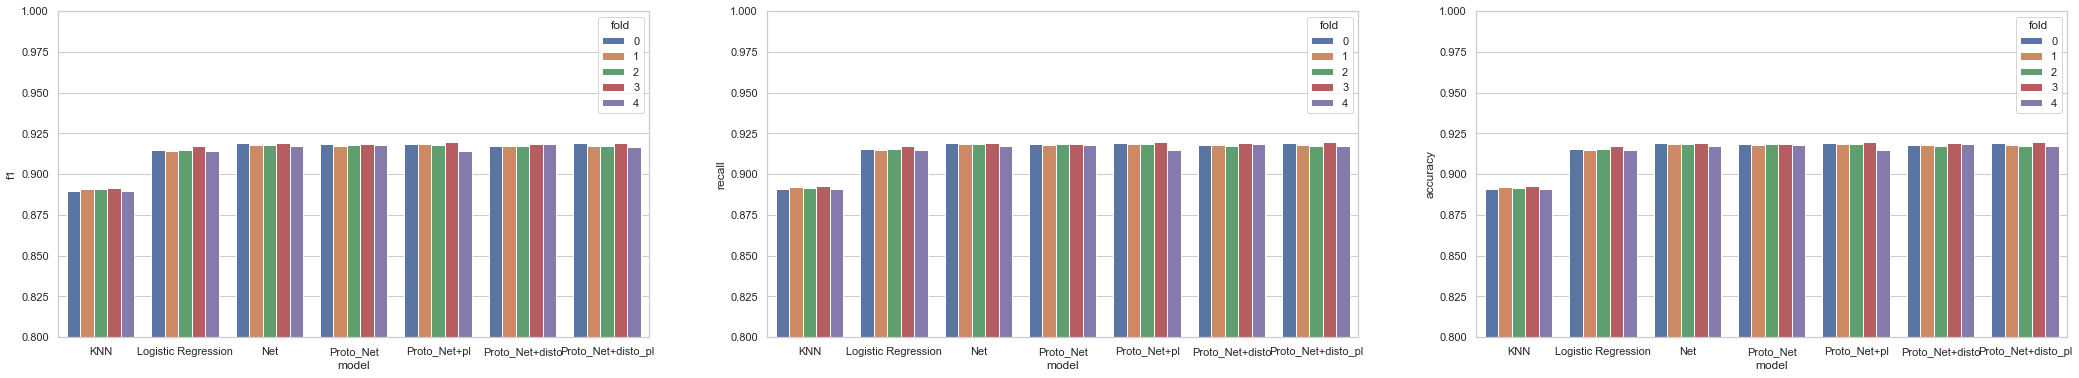

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(36, 6)
sns.barplot(x='model', y='f1', data=results, hue='fold', order=['KNN', 'Logistic Regression', 'Net', 'Proto_Net', 'Proto_Net+pl', 'Proto_Net+disto', 'Proto_Net+disto_pl'],  ax=ax1)
ax1.set_ylim(0.8, 1)
sns.barplot(x='model', y='recall', data=results,hue='fold', order=['KNN', 'Logistic Regression', 'Net', 'Proto_Net', 'Proto_Net+pl', 'Proto_Net+disto', 'Proto_Net+disto_pl'],  ax=ax2)
ax2.set_ylim(0.8, 1)
sns.barplot(x='model', y='accuracy', data=results, hue='fold', order=['KNN', 'Logistic Regression', 'Net', 'Proto_Net', 'Proto_Net+pl', 'Proto_Net+disto', 'Proto_Net+disto_pl'], ax=ax3)
ax3.set_ylim(0.8, 1)

(5.0, 15.0)

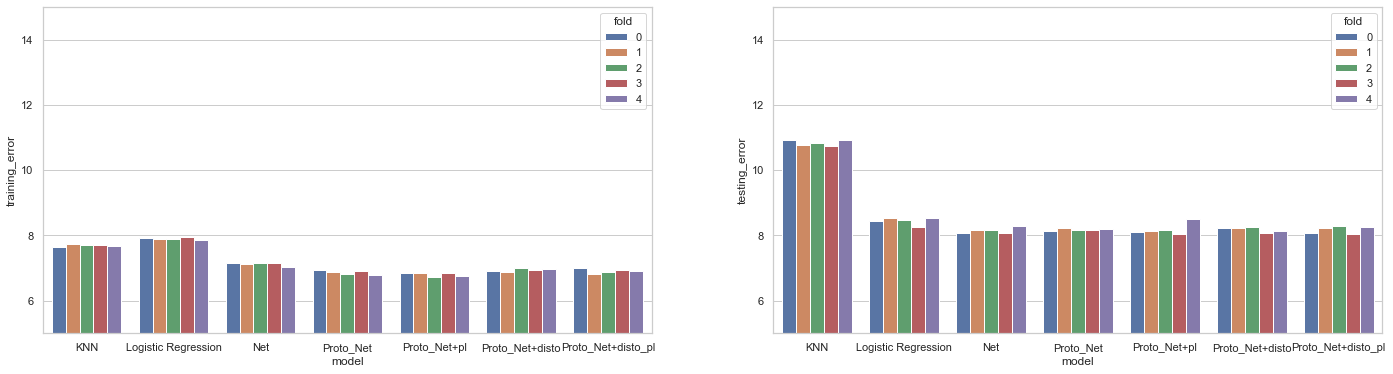

In [52]:
fig, (ax4, ax5) = plt.subplots(1, 2)
fig.set_size_inches(24, 6)
sns.barplot(x='model', y='training_error', data=results, hue='fold', order=['KNN', 'Logistic Regression', 'Net', 'Proto_Net', 'Proto_Net+pl', 'Proto_Net+disto', 'Proto_Net+disto_pl'],  ax=ax4)
ax4.set_ylim(5, 15)
sns.barplot(x='model', y='testing_error', data=results, hue='fold', order=['KNN', 'Logistic Regression', 'Net', 'Proto_Net', 'Proto_Net+pl', 'Proto_Net+disto', 'Proto_Net+disto_pl'],  ax=ax5)
ax5.set_ylim(5, 15)

In [44]:
# load results_dict from results_0908
results_dict = joblib.load('results_0908/celltypist_results_dict.pkl')

In [61]:
dataset_celltypist = sc.read("./pre_processed_datasets/celltypist_pca.h5ad")
celltypes_celltypist = dataset_celltypist.obs['Manually_curated_celltype'].values

all_models = ['KNN', 'Logistic Regression', 'Net', 'Proto_Net', 'Proto_Net+pl', 'Proto_Net+disto', 'Proto_Net+disto_pl']

# load encoders
encoder_celltype = joblib.load('results_0908/encoder_celltype.pickle')
encoder_celltype_inner = joblib.load('results_0908/encoder_celltype_inner.pickle')

# load list_ct and list_inner_nodes
list_ct = joblib.load('results_0908/list_ct.pickle')
list_inner_nodes = joblib.load('results_0908/list_inner_nodes.pickle')

# load the garph
g = joblib.load('results_0908/g.pkl')

# load cv
cv = joblib.load('results_0908/cv.pkl')

all_keys = results_dict.keys()
keys_fold_0 = [key for key in all_keys if 'fold_0' in key]
keys_fold_1 = [key for key in all_keys if 'fold_1' in key]
keys_fold_2 = [key for key in all_keys if 'fold_2' in key]
keys_fold_3 = [key for key in all_keys if 'fold_3' in key]
keys_fold_4 = [key for key in all_keys if 'fold_4' in key]

true_labels_fold_0 = celltypes_celltypist[cv[0]['test']]
true_labels_fold_1 = celltypes_celltypist[cv[1]['test']]
true_labels_fold_2 = celltypes_celltypist[cv[2]['test']]
true_labels_fold_3 = celltypes_celltypist[cv[3]['test']]
true_labels_fold_4 = celltypes_celltypist[cv[4]['test']]

In [83]:
df_dist = pd.DataFrame(columns=['model', 'fold', 'distance'])

print('fold 0')
for key in keys_fold_0:
    pred_labels = results_dict[key]
    for i in range(len(pred_labels)):
        dist = helper_fns.get_shortest_dist(helper_fns.transform(pred_labels[i], list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), 
            helper_fns.transform(true_labels_fold_0[i], list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), g)
        df_dist = pd.concat([df_dist, pd.DataFrame([[keys_fold_0[0].split('_fold_0')[0], 'fold_0' , dist]], columns=['model', 'fold', 'distance'])], ignore_index=True)

print('fold 1')
for key in keys_fold_1:
    pred_labels = results_dict[key]
    for i in range(len(pred_labels)):
        dist = helper_fns.get_shortest_dist(helper_fns.transform(pred_labels[i], list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), 
            helper_fns.transform(true_labels_fold_1[i], list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), g)
        df_dist = pd.concat([df_dist, pd.DataFrame([[keys_fold_1[0].split('_fold_1')[0], 'fold_1' , dist]], columns=['model', 'fold', 'distance'])], ignore_index=True)

print('fold 2')
for key in keys_fold_2:
    pred_labels = results_dict[key]
    for i in range(len(pred_labels)):
        dist = helper_fns.get_shortest_dist(helper_fns.transform(pred_labels[i], list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), 
            helper_fns.transform(true_labels_fold_2[i], list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), g)
        df_dist = pd.concat([df_dist, pd.DataFrame([[keys_fold_2[0].split('_fold_2')[0], 'fold_2' , dist]], columns=['model', 'fold', 'distance'])], ignore_index=True)

print('fold 3')
for key in keys_fold_3:
    pred_labels = results_dict[key]
    for i in range(len(pred_labels)):
        dist = helper_fns.get_shortest_dist(helper_fns.transform(pred_labels[i], list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), 
            helper_fns.transform(true_labels_fold_3[i], list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), g)
        df_dist = pd.concat([df_dist, pd.DataFrame([[keys_fold_3[0].split('_fold_3')[0], 'fold_3' , dist]], columns=['model', 'fold', 'distance'])], ignore_index=True)

print('fold 4')
for key in keys_fold_4:
    pred_labels = results_dict[key]
    for i in range(len(pred_labels)):
        dist = helper_fns.get_shortest_dist(helper_fns.transform(pred_labels[i], list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), 
            helper_fns.transform(true_labels_fold_4[i], list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), g)
        df_dist = pd.concat([df_dist, pd.DataFrame([[keys_fold_4[0].split('_fold_4')[0], 'fold_4' , dist]], columns=['model', 'fold', 'distance'])], ignore_index=True)

fold 0
fold 1
fold 2
fold 3


KeyboardInterrupt: 

In [84]:
# Save df_dist
df_dist.to_csv('results_0908/pred_distance.csv', index=False)

In [82]:
63738*7*5

2230830

celltypist -> ID ---END---

In [ ]:
for key in wrong_dict_logistic_regression_list[n].keys():
    celltype = wrong_dict_logistic_regression_list[n]['Celltype']
    if key != 'Celltype' and key != 'true_positive_rate':
        num = int(wrong_dict_logistic_regression_list[n][key])
        dist = helper_fns.get_shortest_dist(helper_fns.transform(key, list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), 
        helper_fns.transform(celltype, list_ct, list_inner_nodes, encoder_celltype, encoder_celltype_inner), g)
        for i in range(num):
            # concat the new row to the dataframe
            df_dist = pd.concat([df_dist, pd.DataFrame([[celltype, key , dist, 'logistic']], columns=['celltype', 'pred_celltype', 'dist', 'model'])], ignore_index=True)